# Almog PIV project

See Readme.md

February 15
Run 2, smallest cylinder 


In [17]:
from pivpy import pivpy, io, graphics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 10)


In [18]:
import pathlib
root_path = pathlib.Path('/media/user/ExtremePro/almog/feb15-')
analysis_path = root_path / 'Analysis'
image_path = root_path / 'RawData'

# run 2:
run_no = 2
first_file = 210
num_files = 100


list_files = sorted(analysis_path.rglob('feb15-000*.vec'))
netcdf_file = f'../data/feb15_run{run_no}.nc'
res_png = f'../results/feb15-run{run_no}.png'



In [19]:

# since we have some demo files 200, 202, we need to start with 210
ids = np.array([int(str(f).split('feb15-')[-1].split('.')[0]) for f in list_files])

# manually substitute the first and the last files
selection = np.nonzero([(ids >= first_file) & (ids<first_file+num_files)])

list_files = np.array(list_files)[selection[1]]

In [20]:
len(list_files), list_files[0], list_files[-1]

(100,
 PosixPath('/media/user/ExtremePro/almog/feb15-/Analysis/feb15-000210.T000.D000.P000.H000.L.vec'),
 PosixPath('/media/user/ExtremePro/almog/feb15-/Analysis/feb15-000309.T000.D000.P000.H000.L.vec'))

In [21]:
data = []
for i,f in enumerate(list_files):
    data.append(io.load_insight_vec_as_csv(f,frame=i))

data = xr.concat(data,dim='t')

(<Figure size 1000x1000 with 2 Axes>,
 <AxesSubplot: title={'center': 't = 98 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

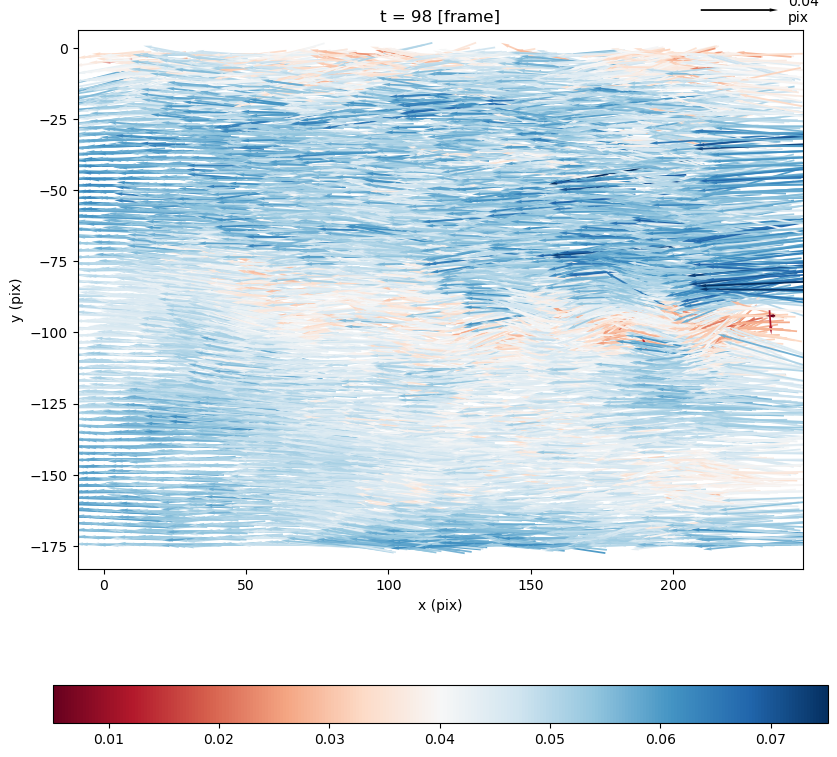

In [22]:
data.isel(t=-2).piv.quiver(colorbar=True,colorbar_orient='horizontal',arrScale=5)

In [23]:
data

<xarray.Dataset>
Dimensions:  (x: 102, y: 76, t: 100)
Coordinates:
  * x        (x) float64 2.297 4.593 6.89 9.187 ... 227.4 229.7 232.0 234.3
  * y        (y) float64 -2.297 -4.593 -6.89 -9.187 ... -170.0 -172.2 -174.5
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
Data variables:
    u        (x, y, t) float64 -0.04325 -0.03891 -0.03732 ... -0.05233 -0.05926
    v        (x, y, t) float64 -0.01086 8.2e-05 -0.002139 ... 0.000146 -0.003989
    chc      (x, y, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 4.0 4.0
Attributes: (2)

In [24]:
data.to_netcdf(netcdf_file)

In [25]:
# ds = io.load_directory('/media/user/ExtremePro/amiad/spacer_68_/Analysis/')
# ds.to_netcdf('../data/spacer_68.nc')
# ds = xr.load_dataset('../data/spacer_68.nc')
ds = xr.load_dataset(netcdf_file)

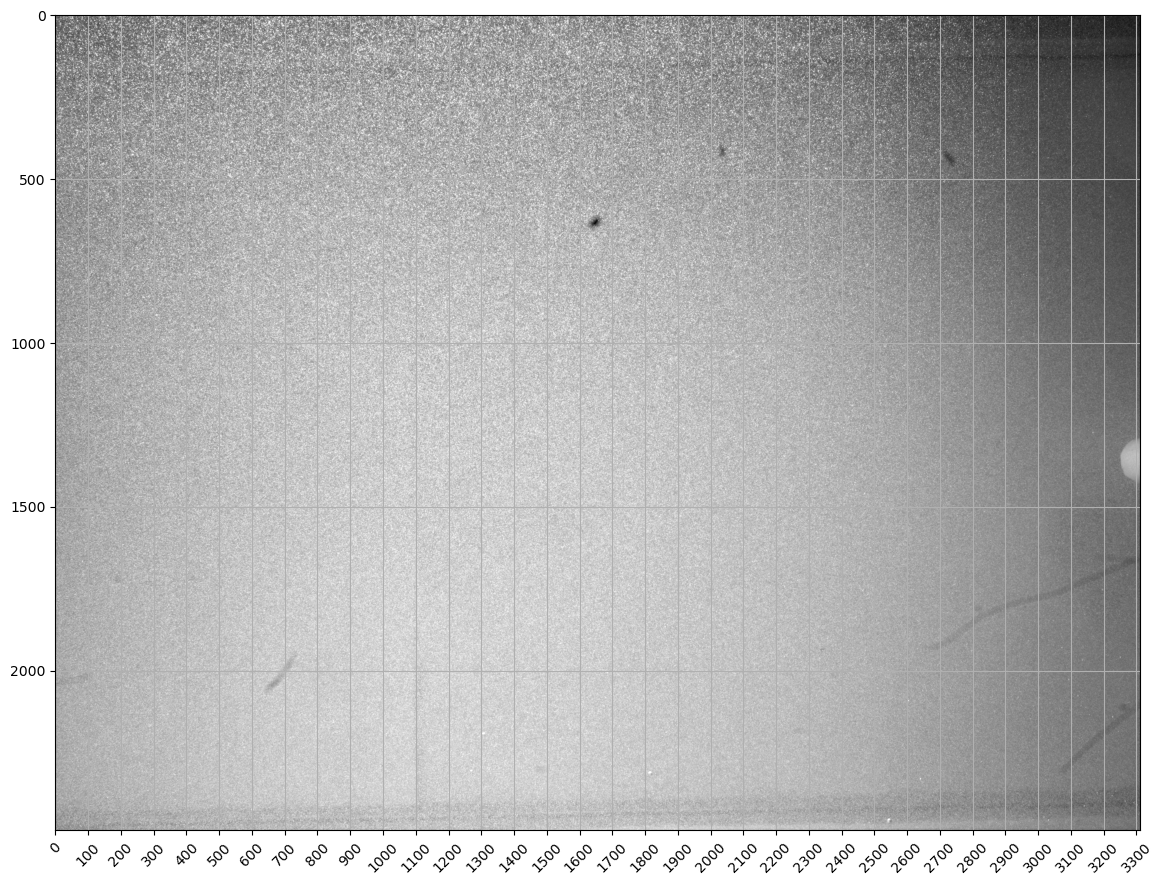

In [26]:
# im = plt.imread('/media/user/ExtremePro/amiad/spacer_68_/RawData/test000120.T000.D000.P000.H000.LB.TIF')
im = plt.imread(image_path / f'feb15-000{first_file}.T000.D000.P000.H000.LB.TIF')

from skimage import exposure 
plt.figure(figsize=(14,14))
plt.imshow(exposure.adjust_gamma(im,.3), cmap='gray')
plt.xticks(np.arange(0,im.shape[1],100),rotation=45)
plt.grid('on')


In [27]:
# right point on 1 is 3240, 1387
# left point on 24 36, 1452
# open the scale image
dist = np.sqrt((3240-36)**2 + (1452-1387)**2)
dist

3204.6592642588384

In [28]:
# we measured 
# mm_diameter = 230 # mm
# pix_diameter = 3204 # pix, see above
# dt = 10000e-6 # 10,000 microseconds = 10 msec = 0.01 sec

mm_diameter = 1
pix_diameter = 1
dt = 1

# ds = ds.piv.set_scale(mm_diameter/pix_diameter)
# ds = ds.piv.set_delta_t(dt)
ds['u'] = ds['u']*mm_diameter/pix_diameter
ds['v'] = ds['v']*mm_diameter/pix_diameter
ds['u'] = ds.u / dt
ds['v'] = ds.v / dt

# # now size is in mm and velocity in m/s

ave = ds.piv.average

In [29]:
# import napari
# viewer = napari.Viewer()
# viewer.add_image(im)
# manually measured 750 pixels which is the width 24 mm 

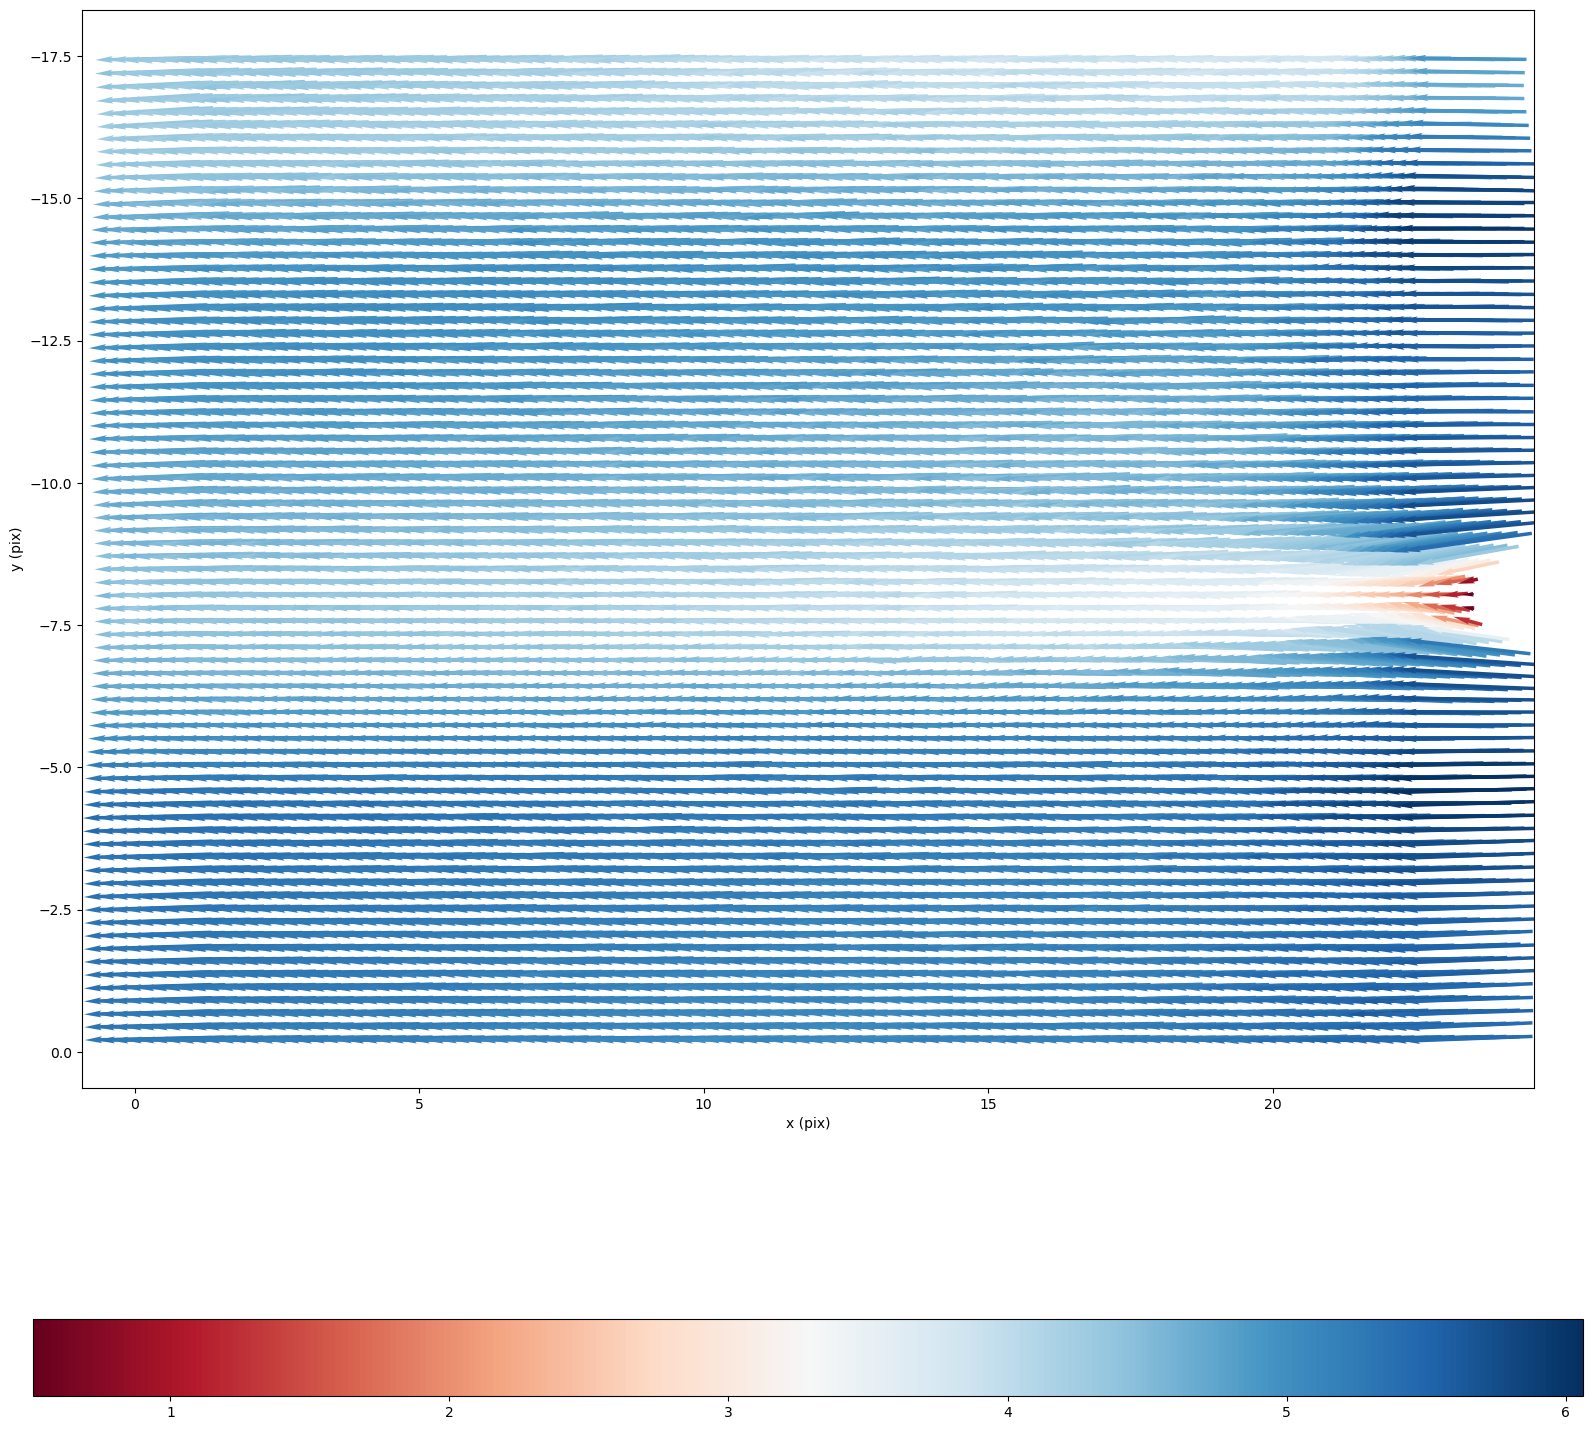

In [30]:
plt.figure(figsize=(20,20))
# plt.imshow(exposure.adjust_gamma(im,.3), cmap='gray',origin='upper')
tmp = ave.copy(deep=True)
tmp['y'] = tmp['y'][::-1]
tmp['x'] = tmp['x']/10
tmp['y'] = tmp['y']/10
tmp['u'] = tmp['u']*100
tmp['v'] = tmp['v']*100 # cm/s 

tmp.piv.quiver(arrScale = 10,colorbar=True, colorbar_orient='horizontal', nthArr = 5)
plt.gca().invert_yaxis()
plt.savefig(res_png,dpi=200)